In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Шаг 1: Загрузка данных и EDA
data = pd.read_csv('train_3.2.csv')

# Огляд данных
print(data.head())
print(data.info())
print(data.describe())

   id   loc  v(g)  ev(g)  iv(g)     n       v     l      d      i  ...  \
0   0  22.0   3.0    1.0    2.0  60.0  278.63  0.06  19.56  14.25  ...   
1   1  14.0   2.0    1.0    2.0  32.0  151.27  0.14   7.00  21.11  ...   
2   2  11.0   2.0    1.0    2.0  45.0  197.65  0.11   8.05  22.76  ...   
3   3   8.0   1.0    1.0    1.0  23.0   94.01  0.19   5.25  17.86  ...   
4   4  11.0   2.0    1.0    2.0  17.0   60.94  0.18   5.63  12.44  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0      17          1        1                  0     16.0        9.0   
1      11          0        1                  0     11.0       11.0   
2       8          0        1                  0     12.0       11.0   
3       4          0        2                  0      8.0        6.0   
4       7          0        2                  0      7.0        6.0   

   total_Op  total_Opnd  branchCount  defects  
0      38.0        22.0          5.0    False  
1      18.0        14.0   

Пропущенные значения:
 id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


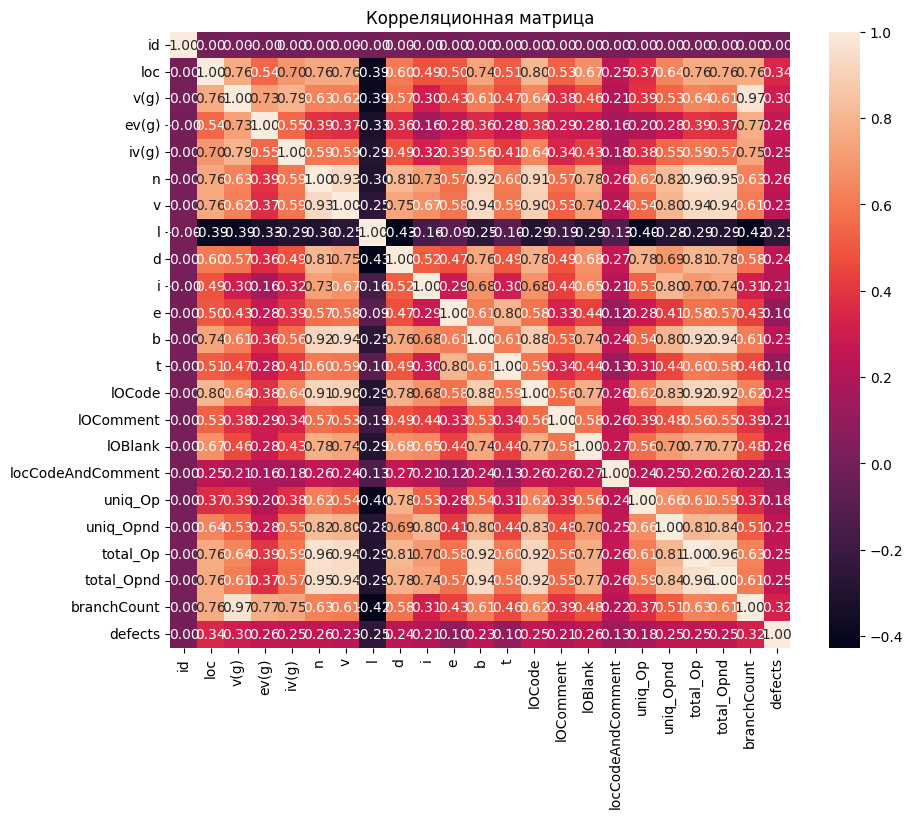

In [3]:
# EDA: Анализ пропусков
missing_values = data.isnull().sum()
print("Пропущенные значения:\n", missing_values)

# Корреляция
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [5]:
X=data.drop(['defects'], axis=1)
y=data['defects']

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [14]:
def create_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid') 
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

In [23]:
input_shape = X_train.shape[1]  # Размер входного слоя
input_shape
model = create_model(22)

ValueError: Cannot convert '22' to a shape.